In [5]:
from ome_zarr.reader import Reader
from ome_zarr.io import parse_url

In [7]:
path = '/data/SmartSPIM_661398_2023-06-16_16-11-11_stitched_2023-06-22_21-18-16/processed/stitching/OMEZarr/Ex_639_Em_660.zarr'

reader = Reader(parse_url(path))

In [9]:
nodes = list(reader())

In [11]:
nodes

[/data/SmartSPIM_661398_2023-06-16_16-11-11_stitched_2023-06-22_21-18-16/processed/stitching/OMEZarr/Ex_639_Em_660.zarr [zgroup]]

In [12]:
image_node = nodes[0]

dask_data = image_node.data

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(dask_data[-1][0,0,:,:,100])

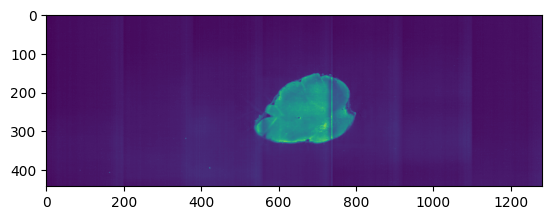

In [36]:
plt.imshow(dask_data[-2][0,0,:,:,100])

In [37]:
volume = np.array(dask_data[-2][0,0,:,:,:])

In [38]:
import numpy as np

volume.shape

(442, 1281, 925)

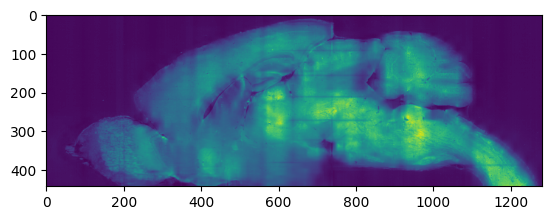

In [109]:
plt.imshow(volume[:,:,500])

In [110]:
sub_volume = volume[:,100:1124,:]

In [111]:
sub_volume.shape

(442, 1024, 925)

In [142]:
new_volume = np.zeros((1024,1024,1024), dtype='uint16')

In [143]:
new_volume[291:733,:,49:974] = sub_volume

In [122]:
1023-49

974

In [144]:

v = (new_volume.astype('float64') / 65536)
v = v * 255 * 255
#v = v.astype('uint8')

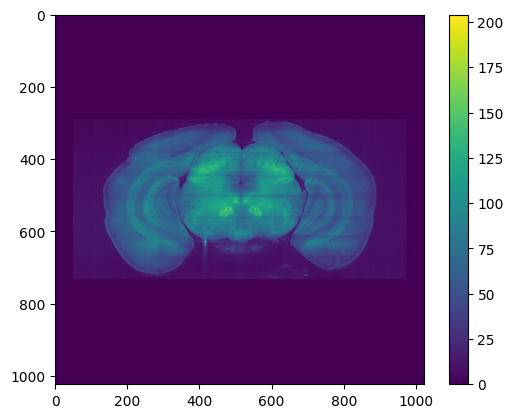

In [145]:
plt.imshow(v[:,640,:].astype('uint8'))
plt.colorbar()

In [146]:
v = v.astype('uint8')

In [147]:
v.dtype

dtype('uint8')

In [148]:
np.save('/results/volume.npy', v)